In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('friends.csv',sep="|")

In [3]:
df.head(3)

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C
0,Rahul,Pandey,37_M,B,175.4,85.6,37,1500.0,200.0,300
1,Rakesh,Kumar,38_M,B,NaN,xx,38,NaN,1000.0,NaN
2,Nitesh,Mondol,35_F,B,165.1,?,35,500.0,-100.0,200


In [4]:
df.shape

(10, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fname       10 non-null     object 
 1   lname       10 non-null     object 
 2   age_sex     10 non-null     object 
 3   section     10 non-null     object 
 4   height(cm)  9 non-null      object 
 5   weight(kg)  10 non-null     object 
 6   age         10 non-null     int64  
 7   spend_A     8 non-null      float64
 8   spend_B     9 non-null      float64
 9   spend_C     7 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 928.0+ bytes


In [6]:
df.isna().sum()

fname         0
lname         0
age_sex       0
section       0
height(cm)    1
weight(kg)    0
age           0
spend_A       2
spend_B       1
spend_C       3
dtype: int64

In [7]:
df['height(cm)'].dtype

dtype('O')

In [8]:
df['height(cm)']=pd.to_numeric(df['height(cm)'],errors='coerce')

In [9]:
df['height(cm)'].dtype

dtype('float64')

In [10]:
df['height(cm)'].fillna(df['height(cm)'].mode()[0],inplace=True)

In [11]:
df['weight(kg)']=pd.to_numeric(df['weight(kg)'],errors='coerce')

In [12]:
df.drop(columns=['spend_A','spend_B','spend_C'],inplace=True)

In [13]:
#feature engineering
df['gender']=df['age_sex'].apply(lambda x:x.split('_')[1])

In [14]:
df.drop(['age_sex'],axis=1,inplace=True)

In [15]:
df

,fname,lname,section,height(cm),weight(kg),age,gender
0,Rahul,Pandey,B,175.4,85.6,37,M
1,Rakesh,Kumar,B,0.0,NaN,38,M
2,Nitesh,Mondol,B,165.1,NaN,35,F
3,Arvind,Dwivedi,A,0.0,55.6,40,M
4,Nikhil,Shikharwar,B,160.8,160.0,39,M
5,Ashutosh,Merothiya,A,0.0,-60.0,36,M
6,Shubhro,Das,C,170.3,75.5,35,F
7,Suvendu,Das,C,155.1,56.8,34,M
8,Swadesh,Kumar,?,154.2,60.6,36,M
9,Arun,Vishwakarma,A,162.1,58.7,38,F


In [16]:
df['weight(kg)'].fillna(df['weight(kg)'].mode()[0],inplace=True)

In [17]:
df.isna().sum()

fname         0
lname         0
section       0
height(cm)    0
weight(kg)    0
age           0
gender        0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fname       10 non-null     object 
 1   lname       10 non-null     object 
 2   section     10 non-null     object 
 3   height(cm)  10 non-null     float64
 4   weight(kg)  10 non-null     float64
 5   age         10 non-null     int64  
 6   gender      10 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 688.0+ bytes


In [19]:
#convert category to numerical
from sklearn.preprocessing import LabelEncoder
df=pd.get_dummies(df,columns=['gender'],drop_first=True)

In [20]:
df

,fname,lname,section,height(cm),weight(kg),age,gender_M
0,Rahul,Pandey,B,175.4,85.6,37,1
1,Rakesh,Kumar,B,0.0,-60.0,38,1
2,Nitesh,Mondol,B,165.1,-60.0,35,0
3,Arvind,Dwivedi,A,0.0,55.6,40,1
4,Nikhil,Shikharwar,B,160.8,160.0,39,1
5,Ashutosh,Merothiya,A,0.0,-60.0,36,1
6,Shubhro,Das,C,170.3,75.5,35,0
7,Suvendu,Das,C,155.1,56.8,34,1
8,Swadesh,Kumar,?,154.2,60.6,36,1
9,Arun,Vishwakarma,A,162.1,58.7,38,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fname       10 non-null     object 
 1   lname       10 non-null     object 
 2   section     10 non-null     object 
 3   height(cm)  10 non-null     float64
 4   weight(kg)  10 non-null     float64
 5   age         10 non-null     int64  
 6   gender_M    10 non-null     uint8  
dtypes: float64(2), int64(1), object(3), uint8(1)
memory usage: 618.0+ bytes


In [22]:
df['section'].unique()

array(['B', 'A', 'C', '?'], dtype=object)

In [23]:
df['section']=df['section'].replace('?',df['section'].mode()[0])

In [24]:
df['section'].unique()

array(['B', 'A', 'C'], dtype=object)

In [25]:
df['weight(kg)']=df['weight(kg)'].apply(lambda x:abs(x))

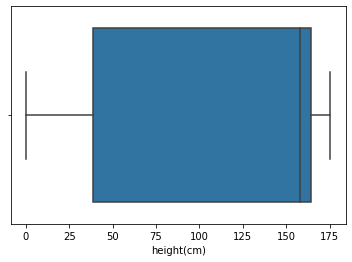

In [26]:
#outlier
sns.boxplot(data=df,x='height(cm)')

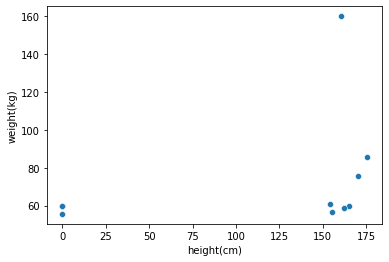

In [27]:
sns.scatterplot(data=df,x='height(cm)',y='weight(kg)')

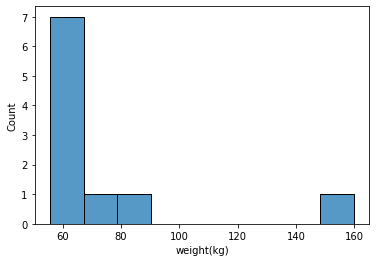

In [28]:
sns.histplot(data=df,x='weight(kg)')

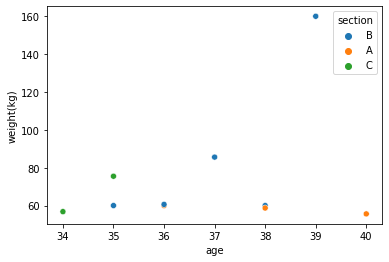

In [29]:
sns.scatterplot(data=df,x='age',y='weight(kg)',hue='section')

In [30]:
#ml
feature=df.drop(columns=['age','fname','lname','section','gender_M'],axis=1)
target=df['age']

In [31]:
feature

,height(cm),weight(kg)
0,175.4,85.6
1,0.0,60.0
2,165.1,60.0
3,0.0,55.6
4,160.8,160.0
5,0.0,60.0
6,170.3,75.5
7,155.1,56.8
8,154.2,60.6
9,162.1,58.7


In [32]:
target

0    37
1    38
2    35
3    40
4    39
5    36
6    35
7    34
8    36
9    38
Name: age, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, shuffle=True)

In [34]:
X_train.shape,y_train.shape

((8, 2), (8,))

In [35]:
X_test.shape,y_test.shape

((2, 2), (2,))

In [36]:
#model training and predicting
from sklearn.linear_model import LogisticRegression

In [37]:
model=LogisticRegression(max_iter=5000)

In [38]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [39]:
y_pred=model.predict(X_test)

In [40]:
y_pred

array([36, 37], dtype=int64)

In [41]:
y_test

2    35
6    35
Name: age, dtype: int64

In [42]:
y_pred-y_test

2    1
6    2
Name: age, dtype: int64

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score(y_test, y_pred)

0.0

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred=model.predict(X_test)

In [47]:
y_test

2    35
6    35
Name: age, dtype: int64

In [48]:
y_pred

array([36.07897048, 36.46719236])

In [49]:
np.sum(y_test)

70

In [50]:
np.sum(y_pred)

72.54616284137023